In [1]:
import xarray as xr
from glob import glob

import numpy as np

import matplotlib.pyplot as plt

###  reading in data

In [17]:

wrffile='//smb.uni-oldenburg.de/hpc_data/NEWA_nc/P-CE-2018-2018-03-01.nc'
#wrffile='//smb.uni-oldenburg.de/hpc_data/NEWA_nc/P-GB-2018-2018-12-17.nc'
wrf=xr.open_dataset(wrffile)

In [18]:
diri_in="//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields"
dom="CE"
ncfiles=glob("/".join([diri_in,dom,"*.nc"]))
ncfiles

['//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields/CE\\Mean_CE_2000_new.nc',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields/CE\\Mean_CE_2001_new.nc',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields/CE\\Mean_CE_2002_new.nc',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields/CE\\Mean_CE_2003_new.nc',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields/CE\\Mean_CE_2004_new.nc',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields/CE\\Mean_CE_2005_new.nc',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields/CE\\Mean_CE_2006_new.nc',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields/CE\\Mean_CE_2007_new.nc',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields/CE\\Mean_CE_2008_new.nc',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields/CE\\Mean_CE_2009_new.nc',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields/CE\\Mean_CE_20

In [4]:
ds_all=xr.open_dataset("//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/mean_fields/CE"+"/all/Mean_CE_1989-2018.nc")

In [19]:

ds=xr.open_mfdataset(ncfiles,combine='nested',concat_dim="time")

In [20]:
ds.WSPD.isel(level=2,time=slice(11,17)).time.values

array([20110101., 20120101., 20130101., 20140101., 20150101., 20160101.])

In [21]:
ds = ds.assign_coords(west_east=(('west_east',), wrf.west_east.values/1e3),
                      south_north=(('south_north'), wrf.south_north.values/1e3))

In [22]:
mu=ds.WSPD.isel(level=2,time=slice(11,17)).mean(dim="time")

In [23]:
std=np.sqrt(ds.WVAR.isel(level=2,time=slice(7,20)).mean(dim="time")).rename("WSTD")

In [24]:
mu.attrs["units"] = "m/s"
std.attrs["units"] = "m/s"

Text(0.5, 0, 'x [km]')

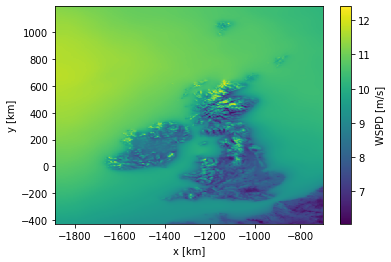

In [9]:
mu.plot()
plt.ylabel("y [km]")
plt.xlabel("x [km]")

Text(0.5, 0, 'x [km]')

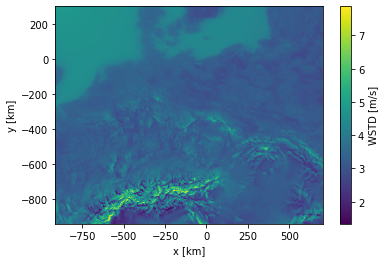

In [25]:
std.plot()
plt.ylabel("y [km]")
plt.xlabel("x [km]")

In [15]:
#matplotlib notebook
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rcParams['text.usetex'] = False
#plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [16]:
all_means=[ds_all.WSPD.isel(level=2).mean().values]
all_varis=[ds_all.WVAR.isel(level=2).mean().values]
means=ds.WSPD.isel(level=2,time=slice(7,20)).mean(dim=["south_north","west_east"]).values
varis=ds.WVAR.isel(level=2,time=slice(7,20)).mean(dim=["south_north","west_east"]).values
std=np.sqrt(varis)
std=ds.WSPD.isel(level=2,time=slice(7,20)).std(dim=["south_north","west_east"]).values

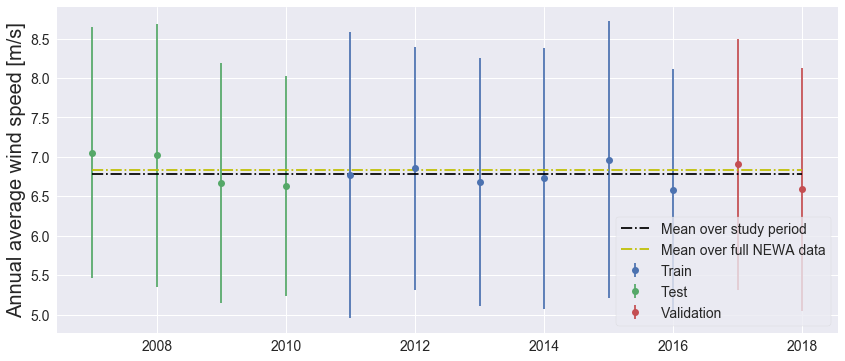

In [17]:
years=np.arange(2007,2019,1)
plt.figure(figsize=(14,6))
#plt.plot(years,means,"--k")
plt.errorbar(years[4:-2],means[4:-2],yerr=std[4:-2],label="Train",fmt="o")
plt.errorbar(years[0:4],means[0:4],yerr=std[0:4],label="Test",fmt="o")
plt.errorbar(years[-2:],means[-2:],yerr=std[-2:],label="Validation",fmt="o")
plt.plot([years[0],years[-1]],[np.mean(means)]*2,"-.k",label="Mean over study period")
plt.plot([years[0],years[-1]],all_means*2,"-.y",label="Mean over full NEWA data")
plt.ylabel("Annual average wind speed [m/s]")
plt.legend(loc="lower right",frameon=True)


Text(0, 0.5, 'Wind speed variance [m$^2$/s$^2$]')

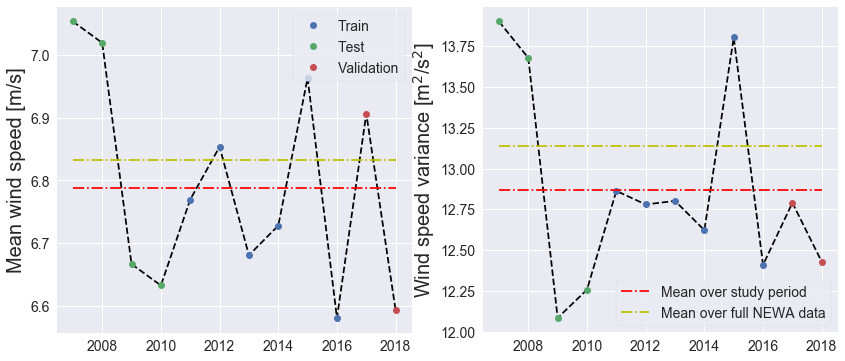

In [18]:
#fig, ax = plt.subplots()
all_means=[ds_all.WSPD.isel(level=2).mean().values]
all_varis=[ds_all.WVAR.isel(level=2).mean().values]
means=ds.WSPD.isel(level=2,time=slice(7,20)).mean(dim=["south_north","west_east"]).values
varis=ds.WVAR.isel(level=2,time=slice(7,20)).mean(dim=["south_north","west_east"]).values
years=np.arange(2007,2019,1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(years,means,"--k")
plt.plot(years[4:-2],means[4:-2],"o",label="Train")
plt.plot(years[0:4],means[0:4],"o",label="Test")
plt.plot(years[-2:],means[-2:],"o",label="Validation")
plt.plot([years[0],years[-1]],[np.mean(means)]*2,"-.r")#,label="Mean over study period")
plt.plot([years[0],years[-1]],all_means*2,"-.y")#,label="Mean over full NEWA data")
plt.ylabel("Mean wind speed [m/s]")
plt.legend(loc="upper right",frameon=True)

plt.subplot(122)
plt.plot(years,varis,"--k")
plt.plot(years[4:-2],varis[4:-2],"o")#,label="Train")
plt.plot(years[0:4],varis[0:4],"o")#,label="Test")
plt.plot(years[-2:],varis[-2:],"o")#,label="Validation")
plt.plot([years[0],years[-1]],[np.mean(varis)]*2,"-.r",label="Mean over study period")
plt.plot([years[0],years[-1]],all_varis*2,"-.y",label="Mean over full NEWA data")
plt.legend(loc="lower right",frameon=True)
plt.ylabel(r"Wind speed variance [m$^2$/s$^2$]")

#.plot.line("--o")


#### Mean annual variance in wind speed (1999-2008) 

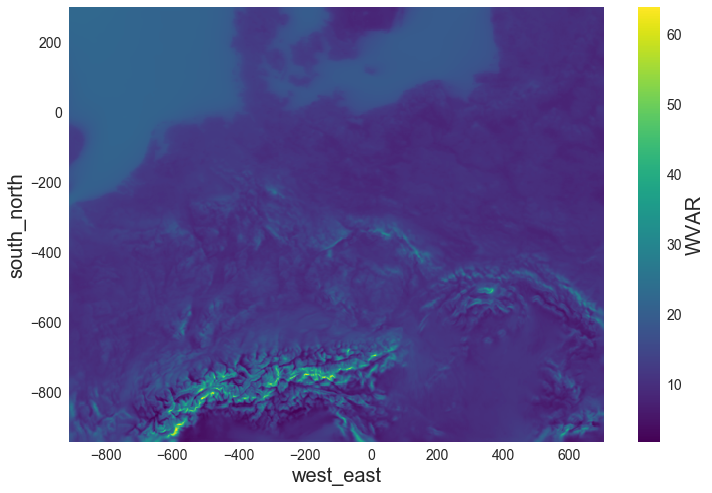

In [19]:
ds.WVAR.isel(time=slice(0,10),level=2).mean(dim="time").plot()

### Variance of mean annual wind speed (1999-2008) 

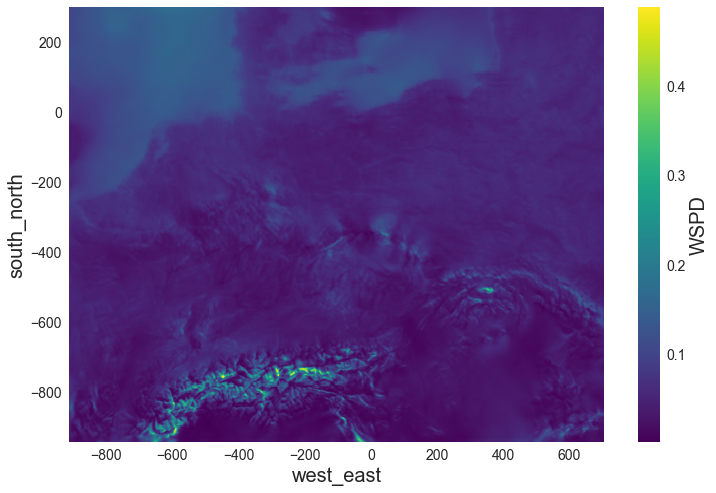

In [20]:
ds.WSPD.isel(time=slice(0,10),level=2).var(dim="time").plot()

### Mean annual ws diff between (1999-2008) and (2009-2018) 

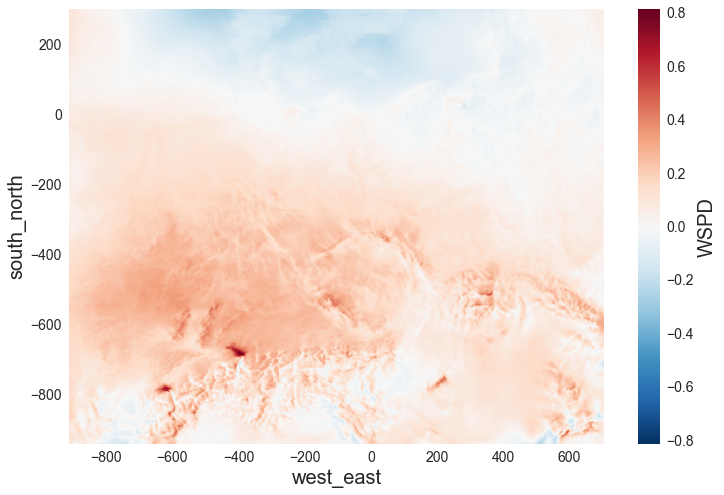

In [21]:
(ds.WSPD.isel(time=slice(0,10),level=2).mean(dim="time")-ds.WSPD.isel(time=slice(10,20),level=2).mean(dim="time")).plot()

### Mean annual ws diff between every second year for (1999-2018)

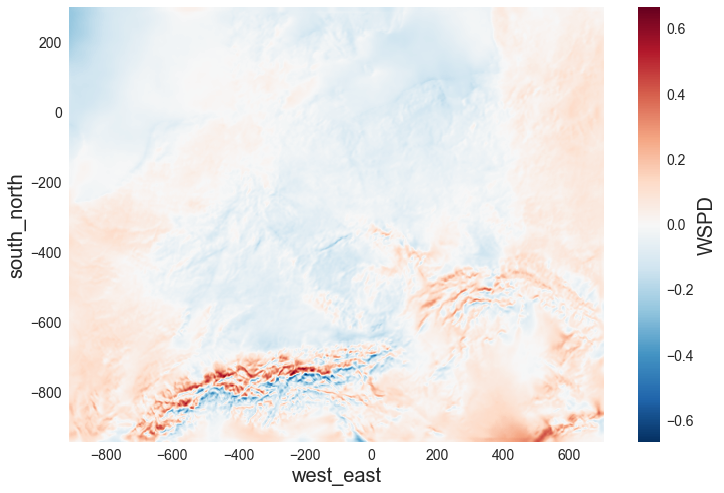

In [22]:
(ds.WSPD.isel(time=np.arange(0,19,2),level=2).mean(dim="time")-ds.WSPD.isel(time=np.arange(1,19,2),level=2).mean(dim="time")).plot()

### Sampling every two years gives a closer mean climate than the full 20 yr period

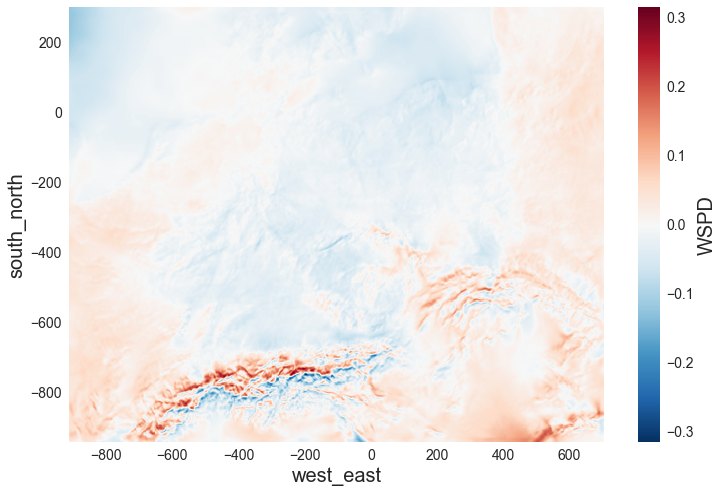

In [23]:
(ds.WSPD.isel(time=np.arange(0,19,2),level=2).mean(dim="time")-ds.WSPD.isel(level=2).mean(dim="time")).plot()

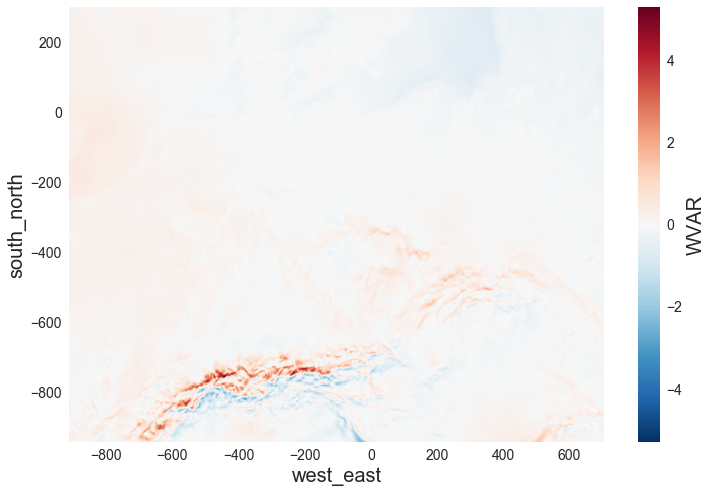

In [24]:
(ds.WVAR.isel(time=np.arange(0,19,2),level=2).mean(dim="time")-ds.WVAR.isel(level=2).mean(dim="time")).plot()

In [25]:
(ds.WSPD.isel(level=2,time=np.arange(0,19,2)).mean(dim=["south_north","west_east"]).std()-ds.WSPD.isel(level=2,time=np.arange(1,19,2)).mean(dim=["south_north","west_east"]).std())

<xarray.DataArray 'WSPD' ()>
dask.array<sub, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>

In [26]:
ds

<xarray.Dataset>
Dimensions:      (level: 5, south_north: 414, time: 19, west_east: 540)
Coordinates:
  * time         (time) float64 2e+07 2.001e+07 ... 2.017e+07 2.018e+07
  * west_east    (west_east) float32 -912.00024 -909.00024 ... 704.99976
  * south_north  (south_north) float32 -938.99835 -935.99835 ... 300.0016
Dimensions without coordinates: level
Data variables:
    XLAT         (time, south_north, west_east) float32 dask.array<chunksize=(1, 414, 540), meta=np.ndarray>
    XLON         (time, south_north, west_east) float32 dask.array<chunksize=(1, 414, 540), meta=np.ndarray>
    LU_INDEX     (time, south_north, west_east) float32 dask.array<chunksize=(1, 414, 540), meta=np.ndarray>
    HGT          (time, south_north, west_east) float32 dask.array<chunksize=(1, 414, 540), meta=np.ndarray>
    ZNT          (time, south_north, west_east) float32 dask.array<chunksize=(1, 414, 540), meta=np.ndarray>
    USTMEAN      (time, south_north, west_east) float32 dask.array<chunksize=(1, 414, 540), meta=np.ndarray>
    RHOMEAN      (time, south_north, west_east) float32 dask.array<chunksize=(1, 414, 540), meta=np.ndarray>
    LEV          (time, level) float32 dask.array<chunksize=(1, 5), meta=np.ndarray>
    WSPD         (time, level, south_north, west_east) float32 dask.array<chunksize=(1, 5, 414, 540), meta=np.ndarray>
    WVAR         (time, level, south_north, west_east) float32 dask.array<chunksize=(1, 5, 414, 540), meta=np.ndarray>
    WMAX         (time, level, south_north, west_east) float32 dask.array<chunksize=(1, 5, 414, 540), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.0 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Fri May 24 15:29:15 2019: cdo -settaxis,2000-01-01 /nfs/gro...
    CDO:          Climate Data Operators version 1.9.0 (http://mpimet.mpg.de/...